In [2]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
import pandas_datareader.data as pdr #Use for accessing stock market data from yahoo/google

In [5]:
from datetime import datetime

In [6]:
from __future__ import division #from python2 if u use python 3 not required

In [7]:
tech_list = ['AAPL','GOOG','MFST','AMZN']

In [8]:
start = datetime(2012, 1, 1)
end = datetime(2013, 1, 27)

In [9]:
for stock in tech_list:
    globals()[stock] = pdr.DataReader(stock,'yahoo',start,end) #for getting data from yahoo finance 
    #globals is setting string name as dataframe name

In [10]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,52.662899,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,52.945919,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,53.533730,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,54.093361,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,54.007557,98506100


In [11]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,267.000000,267.000000,267.000000,267.000000,267.000000,2.670000e+02
mean,81.784173,82.511300,80.810701,81.672702,73.418521,1.338899e+08
std,9.656020,9.684600,9.547644,9.610429,8.649697,5.957699e+07
min,58.485714,58.928570,58.428570,58.747143,52.662899,4.393830e+07
25%,75.796429,76.815716,74.628574,75.741429,68.131881,9.232720e+07
50%,82.470001,83.114288,81.518570,82.400002,73.985207,1.219939e+08
75%,88.085716,88.692856,86.663575,87.729286,78.681252,1.573096e+08
max,100.344284,100.724289,99.938568,100.300003,90.298325,3.765300e+08


In [12]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 267 entries, 2012-01-03 to 2013-01-25
Data columns (total 6 columns):
Open         267 non-null float64
High         267 non-null float64
Low          267 non-null float64
Close        267 non-null float64
Adj Close    267 non-null float64
Volume       267 non-null int64
dtypes: float64(5), int64(1)
memory usage: 14.6 KB


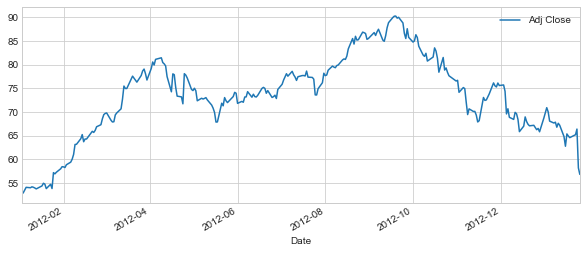

In [13]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

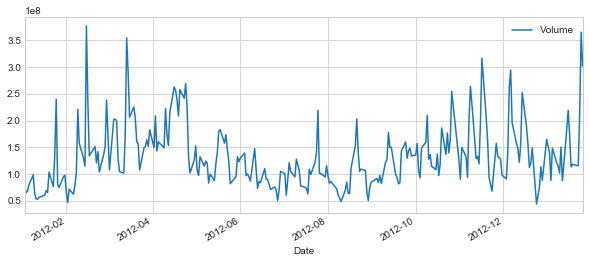

In [14]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [15]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = Series.rolling(AAPL['Adj Close'],window=ma,center=False).mean()

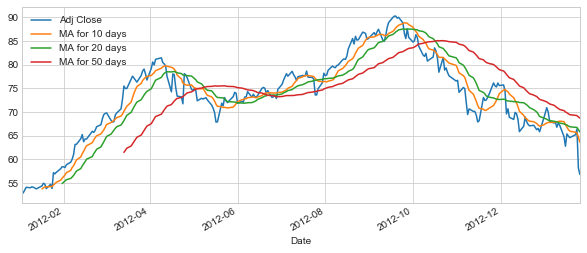

In [16]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))
#subplots helps in making graph with different columns else separate graph will formed

In [17]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,52.662899,75555200,NaN,NaN,NaN
2012-01-04,58.571430,59.240002,58.468571,59.062859,52.945919,65005500,NaN,NaN,NaN
2012-01-05,59.278572,59.792858,58.952858,59.718571,53.533730,67817400,NaN,NaN,NaN
2012-01-06,59.967144,60.392857,59.888573,60.342857,54.093361,79573200,NaN,NaN,NaN
2012-01-09,60.785713,61.107143,60.192856,60.247143,54.007557,98506100,NaN,NaN,NaN


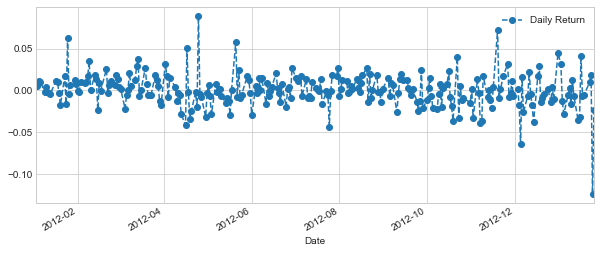

In [20]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change() #percentage change in Adj Close Column

AAPL['Daily Return'].plot(figsize=(10,4),legend= True, linestyle='--', marker='o')

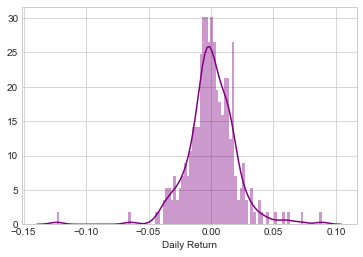

In [22]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

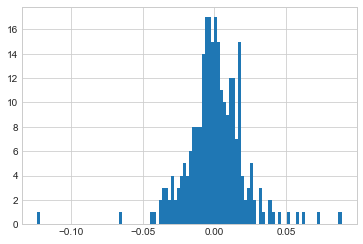

In [24]:
AAPL['Daily Return'].hist(bins=100)

In [31]:
closing_df = pdr.DataReader(tech_list,'yahoo',start,end)['Adj Close'] #sepecfic column

In [33]:
closing_df.head()

,AAPL,AMZN,GOOG,MFST
Date,,,,
2012-01-03,52.662899,179.029999,330.555054,NaN
2012-01-04,52.945919,177.509995,331.980774,NaN
2012-01-05,53.533730,177.610001,327.375732,NaN
2012-01-06,54.093361,182.610001,322.909790,NaN
2012-01-09,54.007557,178.559998,309.218842,NaN


In [35]:
tech_rets = closing_df.pct_change()

In [37]:
tech_rets.head()

,AAPL,AMZN,GOOG,MFST
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,-0.008490,0.004313,NaN
2012-01-05,0.011102,0.000563,-0.013871,NaN
2012-01-06,0.010454,0.028152,-0.013642,NaN
2012-01-09,-0.001586,-0.022178,-0.042399,NaN


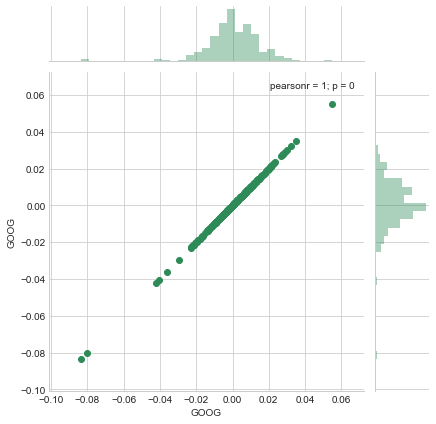

In [39]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen') #colinear realtionship

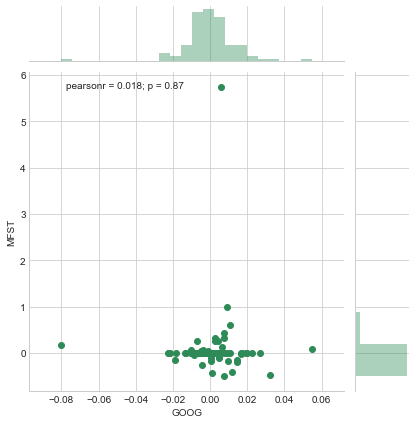

In [42]:
sns.jointplot('GOOG','MFST',tech_rets,kind='scatter',color='seagreen')

In [43]:
#use C-Borne for comparison btw plots

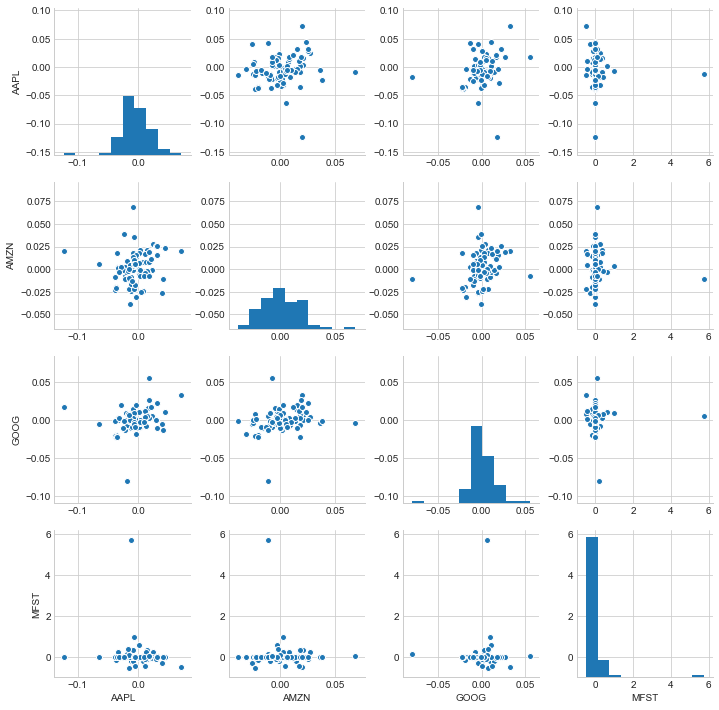

In [45]:
sns.pairplot(tech_rets.dropna())
#for comparsion btw different column is shown in below graphs

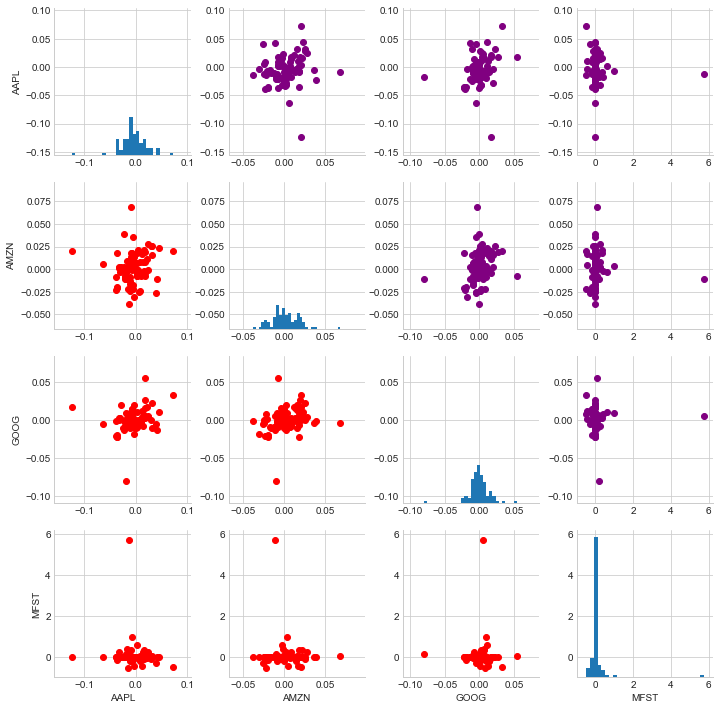

In [56]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(plt.scatter,color='red')

returns_fig.map_diag(plt.hist,bins=30)

C:\Users\Vishal\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


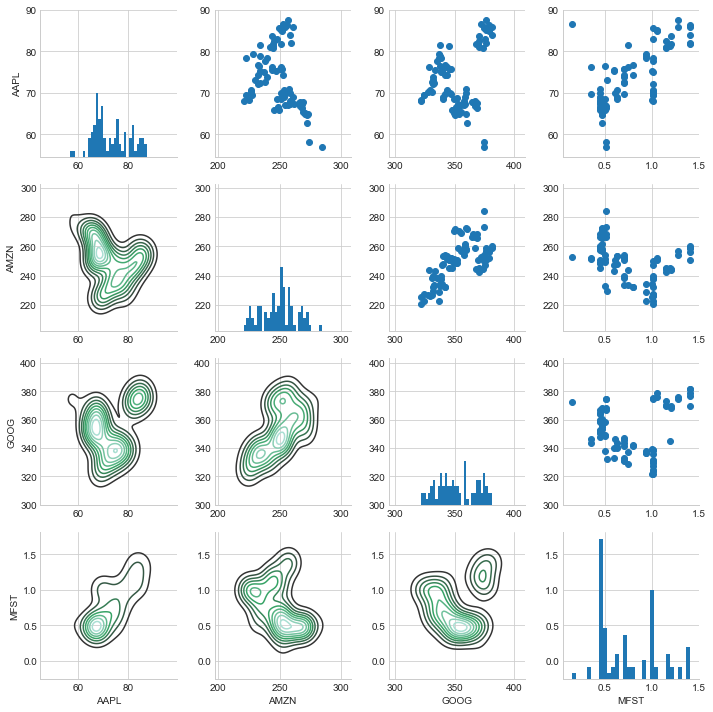

In [63]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter)

returns_fig.map_lower(sns.kdeplot)

returns_fig.map_diag(plt.hist,bins=30)

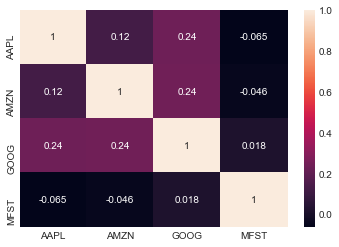

In [75]:
corr = tech_rets.dropna().corr()
sns.heatmap(corr,annot=True)

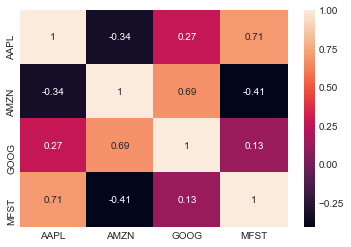

In [78]:
clsing_corr = closing_df.dropna().corr()
sns.heatmap(clsing_corr,annot=True)

In [79]:
# Risk Analysis

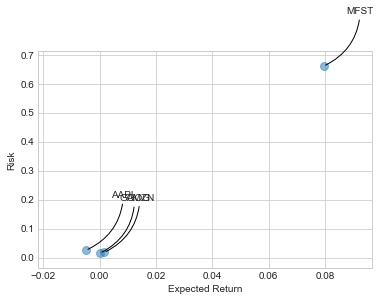

In [84]:
rets = tech_rets.dropna()
area = np.pi*20 #area of scatter plot

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [ ]:
#value at risk